# Mathjax
<script
  src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"
  type="text/javascript">
</script>


<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [['$','$'], ['\\(','\\)']],
      processEscapes: true},
      jax: ["input/TeX","input/MathML","input/AsciiMath","output/CommonHTML"],
      extensions: ["tex2jax.js","mml2jax.js","asciimath2jax.js","MathMenu.js","MathZoom.js","AssistiveMML.js", "[Contrib]/a11y/accessibility-menu.js"],
      TeX: {
      extensions: ["AMSmath.js","AMSsymbols.js","noErrors.js","noUndefined.js"],
      equationNumbers: {
      autoNumber: "AMS"
      }
    }
  });
</script>


**Mathjax config Source**:
[fabriziomusacchio](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/)





### Power Conversion (PC) – Actuators

| **Metric**                               | **Unit**      | **Description**                                                                   |
|------------------------------------------|---------------|-----------------------------------------------------------------------------------|
| Conversion Efficiency (η_PC)             | %| Ratio of mechanical output energy to electrical input energy.                     |
| Actuation Force                          | N   | Mechanical force produced by the actuator.                                        |
| Displacement / Stroke                    | µm       | Amount of movement generated per actuation cycle.                                |
| Resonant Frequency                       | Hz    | Frequency at which the actuator operates most efficiently.                        |
| Response Time / Rise Time                | ms      | Time taken for the actuator to reach full displacement after activation.          |
| Voltage-to-Displacement Sensitivity      | µm/V          | Displacement achieved per unit of applied voltage.                               |





### Imports

In [1]:
import sympy
from sympy import symbols, Eq, sqrt, pi, latex, solveset, Rational, N, pprint, solve
from IPython.display import display, Markdown, Math
import sympy.physics.units as u
from sympy.physics.units import convert_to
from math import log10,floor



In [2]:
class DualNum:
    def __init__(self, val, sym_str):
        self.val = val
        self.sym = symbols(sym_str)

class DualEq:
    def __init__(self, name, func):
        """
        :param name: A string name for the equation.
        :param func: A lambda that accepts a string (either 'sym' or 'val')
                     and returns the desired result.
        """
        #elf.name = name
        # Evaluate the expression twice: once for symbolic and once for numeric.
        self.sym = Eq(symbols(name), func('sym')) 
        self.val = Eq(symbols(name), func('val')) 


### Materials

In [3]:

# Materials
class piezo_crystal:
    def __init__(self, name, abbr, E, nu, E_c, rho, d_31, d_33, h, l, w):
        """
        Initialize a piezoelectric crystal material.
        :param name: Name of the material
        :param abbrev: Abbreviation of the material name
        :param E: Young's modulus [N/m^2] or [Pa]
        :param J: Intinsic Compliance [m^2/N] or [1/Pa]
        :param nu: Poisson's ratio []
        :param G: Shear modulus [N/m^2] or [Pa]
        :param K: Bulk modulus [N/m^2] or [Pa]
        :param E_c: Coercive Field [V/m]
        :param nu: Poisson's ratio []
        :param rho: Density [kg/m^3]
        :param d31: Piezoelectric coefficient d31 [m/V]
        :param d33: Piezoelectric coefficient d33 [m/V]
        :param h: Height [m]
        :param l: Length [m]
        :param w: Width [m]
        """
        self.name = name
        self.abbr = abbr
        self.E = E
        self.nu = nu
        #self.G = self.E/(2*(1+self.nu))
        #self.K = self.E/(3*(1-2*self.nu))
        self.E_c = E_c 
        self.rho = rho
        self.d_31 = d_31
        self.d_33 = d_33
        self.h = h
        self.l = l
        self.w = w


    
class elastic_layer:
    def __init__(self, name, abbr, E, nu, rho, h, l, w):
        """
        Initialize an elastic layer material.
        :param name: Name of the material
        :param abbrev: Abbreviation of the material name
        :param E: Young's modulus [N/m^2] or [Pa]
        :param s: elastic Compliance [m^2/N] or [1/Pa]
        :param nu: Poisson's ratio []
        :param rho: Density [kg/m^3]
        :param h: Height [m]
        :param l: Length [m]
        :param w: Width [m]
        """
        self.name = name
        self.abbr = abbr
        self.E = E
        self.nu = nu
        self.rho = rho
        self.h = h
        self.l = l
        self.w = w


### Forces on Micro-Robot

Current Design Forces permanent on Robot are:
- Sliding Friction $ \mathbf{F_{\text{Fric}}}$
- Viscous Drag $\mathbf{F_{\text{Drag}}}$

The Robot could also be affected by short living, but strong forces like:
- External Flow (e.g. Blood vessels) $\mathbf{F_{\text{Drag}}^E}$
- Various External Forces by living Microorganism (e.g. Bacteria) $\mathbf{F^{\text{Bac}}_{\Sigma}}$
- Strong External Sliding Friction (e.g. Human scratching its face) $ \mathbf{F_{\text{Fric}}^E}$

For the Szenario we create for TinyTapeout10 Robot we assume a well controlled Enviroment, like for example you would find in cell sorting tasks inside a enclosed volume. In this szenario external Forces can be neglected, which makes the design parameters for the robot significantly easier, especially strong flow in small blood vessels or human interaction will create significant design challenges in the future.

In [4]:
class interface_ss:
    def __init__(self):
        pass
class interface_sf:
    def __init__(self):
        pass

In [5]:
# Create objects for PZT_5A and steel
# Promising Materials to investigate
# k33 ≥ 0.90 && d33 ∼1200, pC/N 
#   [PZN-PT] Lead zinc niobate (PZN) + Lead Titanate (PT)   https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4258824
#   [PMN-PT] Lead Magnesium Niobate (PMN) + Lead Titanate (PT)  https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4258824


p = piezo_crystal(
    name='PZT5A',
    abbr='Piezo',
    E=63 * 10e6 * u.newton / (u.meter**2),
    E_c= 12 * ((1e3 * u.volt) / (1e-2 * u.meter)),
    nu=0.31,
    rho=7750 * (u.kg / (u.meter**3)),
    d_31=-175 * ((1e-12 * u.meter )/ u.volt),
    d_33=400 * (1e-12 * u.meter / u.volt),
    h=10 *(1e-6 * u.meter),
    l=40 * (1e-6 * u.meter),
    w=100 *(1e-6 * u.meter),
)

s = elastic_layer(
    name='AISI304',
    abbr='Steel',
    E=193* 10e6 *u.newton / (u.meter**2),
    nu=0.3,
    rho=7872 * (u.kg / (u.meter**3)),
    h=10 *(1e-6* u.meter),
    l=40 * (1e-6* u.meter),
    w=100 *(1e-6* u.meter),
)

In [6]:

# Verifying correct calculation of units
V_max = p.E_c * p.h
V_max.n(3)

12.0*volt

### Basic piezoelectric Actuation equations (latex)


<p align="center">
  <img src="images/piezo_basic_sitti.png" style="width: 70%; height: auto;">
</p>
Source: 978-0-262-03643-6 Page 100 

https://archive.org/details/mobilemicrorobot0000sitt/page/100/


$
\begin{align}
    \delta &= d_{33}V \\
    F_b &= lw \cdot E \cdot \delta \\
    K_m &= \frac{F_b}{\delta} = \frac{lw \cdot E}{h} \\
    f_r &= \frac{N_3^D}{h}
\end{align}
$



In [7]:

# Define symbols
V = symbols('V')
d_33, d_31 = symbols('d_{33} d_{31}')
delta_31, delta_33 = symbols('delta_31 delta_33')
l, w, h = symbols('l w h')
E_33, E_11 = symbols('E_{33} E_{11}')
N_3, N_1 = symbols('N_3 N_1')
K_m = symbols('K_m')
F_b = symbols('F_b')
f_r = symbols('f_r')


# Define equations
eq_ax_displacement = Eq(delta_33, d_33 * V)
eq_ax_Fb = Eq(F_b, (l * w / h) * E_33 * d_33 * V)
eq_ax_coupling = Eq(K_m, (l * w / h) * E_33)
eq_ax_resonance = Eq(f_r, N_3 / h)


eq_tran_displacement = Eq(delta_31, - (w / h) * d_31 * V)
eq_tran_Fb = Eq(F_b, - l * E_11 * d_31 * V) # Blocking force. Maximum Force the Actuator can exert when its displacement is blocked. Aka the Force that can overcome fluid drag and friction
eq_tran_coupling = Eq(K_m, (h * l / w) * E_11) # Electromechanical coupling factor. Higher is better. Max value is 1
eq_tran_resonance = Eq(f_r, N_1 / w)

# Display equations
display(Markdown('Axial Mode'))
display(Math(latex(eq_ax_displacement)))
display(Math(latex(eq_ax_Fb)))
display(Math(latex(eq_ax_coupling)))
display(Math(latex(eq_ax_resonance)))

display(Markdown('Transversal Mode'))
display(Math(latex(eq_tran_displacement)))
display(Math(latex(eq_tran_Fb)))
display(Math(latex(eq_tran_resonance)))
display(Math(latex(eq_tran_coupling)))







Axial Mode

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transversal Mode

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
display(Markdown('Display eq'))
display(eq_ax_displacement)
eq_ax_displacement = Eq(delta_33, d_33 * V)
d_33 = p.d_33
V = 1.03* u.volt
display(solve(eq_ax_displacement, delta_33))



display(Math(latex(eq_ax_displacement)))

Display eq

Eq(delta_33, V*d_{33})

[V*d_{33}]

<IPython.core.display.Math object>

### Basic piezoelectric Actuation equations (latex)


<p align="center">
  <img src="images/piezo_cantilever_sitti_2.png" style="width: 70%; height: auto;">
</p>

Source: 10.1109/ROBOT.2001.933216 
<br>
https://ieeexplore.ieee.org/document/933216
<br>
<br>
<br>
<br>
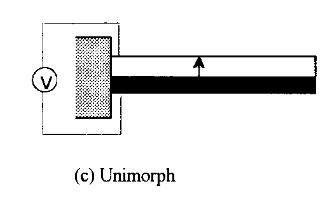


$
\begin{align}
\end{align}
$


In [9]:
eq_R_E = Eq(R_E,R_E.val)






NameError: name 'R_E' is not defined

In [184]:
R_h = DualEq('R_h', lambda attr: getattr(s.h, attr) / getattr(p.h, attr))

display(Eq(R_h.sym,R_h.val.n(5))) # nice way to display
pprint(R_h.sym) # fast and ugly
pprint(R_h.val) # fast and ugly

out = list(solveset(R_h.val))[0].n(5) # actual how to get the actual integer
print(out)





Eq(Eq(R_h, h_Steel/h_Piezo), Eq(R_h, 1.0))

     h_Steel
Rₕ = ───────
     h_Piezo
Rₕ = 1.0
1.0000


In [185]:
R_rho = DualEq('R_rho',lambda attr: getattr(s.rho, attr) / getattr(p.rho, attr))

display(Eq(R_rho.sym,R_rho.val.n(5)))

out = list(solveset(R_rho.val))[0].n(5)
print(out)

Eq(Eq(R_rho, rho_Steel/rho_Piezo), Eq(R_rho, 1.0157))

1.0157


In [186]:
A = Eq('A',R_E * 2)

TypeError: unsupported operand type(s) for *: 'DualEq' and 'int'